In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw01.ipynb")

/home/codespace/.local/lib/python3.12/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


# Homework 1: Causality and Expressions

Please complete this notebook by filling in the cells provided. Before you begin, run the previous cell to load the provided tests.

**Recommended Readings:**

- [What is Data Science?](http://www.inferentialthinking.com/chapters/01/what-is-data-science.html)
- [Causality and Experiments](http://www.inferentialthinking.com/chapters/02/causality-and-experiments.html) 
- [Programming in Python](http://www.inferentialthinking.com/chapters/03/programming-in-python.html)

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

<!-- END QUESTION -->

## 1. Characters in Little Women


In lecture, we counted the number of times that the literary characters were named in each chapter of the classic book, [*Little Women*](https://inferentialthinking.com/chapters/01/3/1/Literary_Characters.html?highlight=little%20women). In computer science, the word "character" also refers to a letter, digit, space, or punctuation mark; any single element of a text. The following code generates a scatter plot in which each dot corresponds to a chapter of *Little Women*. The horizontal position of a dot measures the number of periods in the chapter. The vertical position measures the total number of characters.

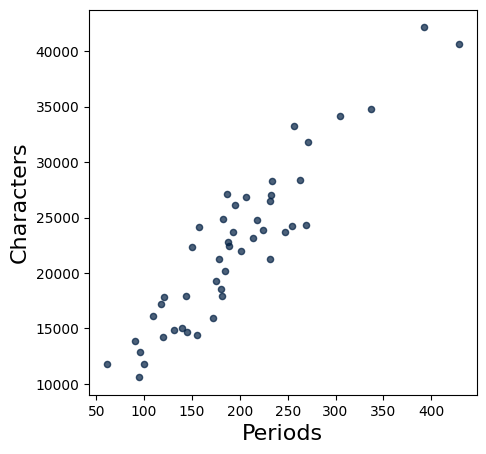

In [2]:
# Just run this cell.

# This cell contains code that hasn't yet been covered in the course,
# but you should be able to interpret the scatter plot it generates.

from datascience import *
from urllib.request import urlopen
import numpy as np
%matplotlib inline

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
chapters = urlopen(little_women_url).read().decode().split('CHAPTER ')[1:]
text = Table().with_column('Chapters', chapters)
Table().with_columns(
    'Periods',    np.char.count(chapters, '.'),
    'Characters', text.apply(len, 0)
    ).scatter(0)

**Question 1.** Around how many periods are there in the chapter with the most characters? Assign either 1, 2, 3, 4, or 5 to the name `characters_q1` below.

1. 250
2. 390
3. 440
4. 32,000
5. 40,000


**Note:** If you run into a `NameError: name 'grader' is not defined` error in the autograder cell below (and in any assignment), please re-run the first cell at the very top of this notebook!


In [3]:
characters_q1 = 2

In [4]:
grader.check("q2_1")

q2_1 results: All test cases passed!

The test above checks that your answers are in the correct format. **This test does not check that you answered correctly**, only that you assigned a number successfully in each multiple-choice answer cell.

**Question 2.** Which of the following chapters has the most characters per period? Assign either 1, 2, or 3 to the name `characters_q2` below.

1. The chapter with about 60 periods
2. The chapter with about 350 periods
3. The chapter with about 440 periods


In [5]:
characters_q2 = 2

In [6]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Again, the test above checks that your answers are in the correct format, but not that you have answered correctly.

To discover more interesting facts from this plot, check out [Section 1.3.2](https://inferentialthinking.com/chapters/01/3/2/Another_Kind_Of_Character.html) in the textbook.

## 2. Names and Assignment Statements

**Question 1.** When you run the following cell, Python produces a cryptic error message.

In [7]:
4 == 2 + 2

True

Choose the best explanation of what's wrong with the code, and then assign 1, 2, 3, or 4 to `names_q1` below to indicate your answer. 

1. Python is smart and already knows `4 = 2 + 2`.

2. In Python, it's a rule that the `=` sign must have a variable name to its left, and `4` isn't a variable name.

3. It should be `2 + 2 = 4`.

4. I don't get an error message. This is a trick question.


In [8]:
names_q1 = 2

In [9]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 2.** When you run the following cell, Python will produce another cryptic error message.

In [10]:
two = 3
six = two plus two

SyntaxError: invalid syntax (3853341378.py, line 2)

Choose the best explanation of what's wrong with the code and assign 1, 2, 3, or 4 to `names_q2` below to indicate your answer.

1. The `plus` operation only applies to numbers, not the word "two".

2. The name "two" cannot be assigned to the number 3.

3. Two plus two is four, not six.

4. The name `plus` isn't a built-in operator; instead, addition uses `+`.


In [11]:
names_q2 = 1

In [12]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.** Run the following cell.

In [13]:
x = 2
y = 3 * x
x = 4

What is `y` after running this cell, and why? Choose the best explanation and assign 1, 2, 3, or 4 to `names_q3` below to indicate your answer.

1. `y` is equal to 6, because the second `x = 4` has no effect since `x` was already defined.

2. `y` is equal to 6, because `x` was 2 when `y` was assigned, and 3 * 2 is 6.

3. `y` is equal to 12, because `x` is 4 and 3 * 4 is 12.

4. `y` is equal to 12, because assigning `x` to 4 will update `y` to 12 since `y` was defined in terms of `x`.


In [14]:
names_q3 = 2

In [15]:
grader.check("q3_3")

q3_3 results: All test cases passed!

## 3. Differences Between Majors

Berkeley’s Office of Planning and Analysis (OPA) provides data on numerous aspects of the campus. Adapted from the OPA website, the table below displays the number of degree recipients in three majors in the 2008-2009 and 2017-2018 academic years.

| Major                              | 2008-2009    | 2017-2018   |
|------------------------------------|--------------|-------------|
| Gender and Women's Studies         |      17      |    28       |
| Linguistics                        |      49      |    67       |
| Rhetoric                           |      113     |    56       |



**Question 1.** Suppose you want to find the **biggest** absolute difference between the number of degree recipients in the two years, among the three majors.

In the cell below, compute this value and call it `biggest_change`. Use a single expression (a single line of code) to compute the answer. Let Python perform all the arithmetic (like subtracting 49 from 67) rather than simplifying the expression yourself. The built-in `abs` function takes a numerical input and returns the absolute value. The built-in `max` function can take in 3 arguments and returns the maximum of the three numbers.


In [16]:
biggest_change = max(abs(17-28), abs(49-67), abs(113-56))
biggest_change

57

In [17]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 2.** Which of the three majors had the **smallest** absolute difference? Assign `smallest_change_major` to 1, 2, or 3 where each number corresponds to the following major:

1. Gender and Women's Studies  
2. Linguistics  
3. Rhetoric

Choose the number that corresponds to the major with the smallest absolute difference.

_Hint:_ You should be able to answer by rough mental arithmetic, without having to calculate the exact value for each major.


In [18]:
smallest_change_major = 3
smallest_change_major

3

In [19]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 3.**  For each major, define the “relative change” to be the following: $\large{\frac{\text{absolute difference}}{\text{value in 2008-2009}} * 100}$ 

Fill in the code below such that `gws_relative_change`, `linguistics_relative_change` and `rhetoric_relative_change` are assigned to the relative changes for their respective majors.


In [20]:
gws_relative_change = (abs(17-28) / 17) * 100
linguistics_relative_change = (abs(49-67) / 17) * 100
rhetoric_relative_change = (abs(113-56) / 17) * 100
gws_relative_change, linguistics_relative_change, rhetoric_relative_change

(64.70588235294117, 105.88235294117648, 335.29411764705884)

In [21]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.** Assign `biggest_rel_change_major` to 1, 2, or 3 where each number corresponds to to the following: 

1. Gender and Women's Studies  
2. Linguistics  
3. Rhetoric

Choose the number that corresponds to the major with the biggest relative change.


In [22]:
biggest_rel_change_major = 3
biggest_rel_change_major

3

In [23]:
grader.check("q4_4")

q4_4 results: All test cases passed!

## 4. Nearsightedness Study

[Myopia](https://en.wikipedia.org/wiki/Myopia), or nearsightedness, results from a number of genetic and environmental factors. In 1999, Quinn et al studied the relation between myopia and ambient lighting at night (for example, from nightlights or room lights) during childhood.

<!-- BEGIN QUESTION -->

**Question 5.1.** The data were gathered by the following procedure, reported in the study. "Between January and June 1998, parents of children aged 2-16 years [...] that were seen as outpatients in a university pediatric ophthalmology clinic completed a questionnaire on the child's light exposure both at present and before the age of 2 years." Was this study observational, or was it a controlled experiment? Explain.


observational becasue the study follows the childrens' lives naturally.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5.2.** The study found that of the children who slept with a room light on before the age of 2, 55% were myopic. Of the children who slept with a night light on before the age of 2, 34% were myopic. Of the children who slept in the dark before the age of 2, 10% were myopic. The study concluded the following: "The prevalence of myopia [...] during childhood was strongly associated with ambient light exposure during sleep at night in the first two years after birth."

Do the data support this statement? Why or why not? You may interpret "strongly" in any reasonable qualitative way.


yes, the data does support this statement because as children slept with less light in their room before the age of 2, less of them developed myopia


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5.3.** On May 13, 1999, CNN reported the results of this study under the headline, "Night light may lead to nearsightedness." Does the original study claim that night light causes nearsightedness?


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5.4.** The final paragraph of the CNN report said that "several eye specialists" had pointed out that the study should have accounted for heredity.

Myopia is passed down from parents to children. Myopic parents are more likely to have myopic children, and may also be more likely to leave lights on habitually (since the parents have poor vision). In what way does the knowledge of this possible genetic link affect how we interpret the data from the study? Explain.


if it can be passed down genetically, then yes 

<!-- END QUESTION -->

## 5. Studying the Survivors

The Reverend Henry Whitehead was skeptical of John Snow’s conclusion about the Broad Street pump. After the Broad Street cholera epidemic ended, Whitehead set about trying to prove Snow wrong.  (The history of the event is detailed [here](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1034367/pdf/medhist00183-0026.pdf).)

He realized that Snow had focused his analysis almost entirely on those who had died. Whitehead, therefore, investigated the drinking habits of people in the Broad Street area who had not died in the outbreak.

What is the main reason it was important to study this group? Assign either 1, 2, or 3 to the name `survivor_answer` below.

1. If Whitehead had found that many people had drunk water from the Broad Street pump and not caught cholera, that would have been evidence against Snow's hypothesis.

2. Survivors could provide additional information about what else could have caused the cholera, potentially unearthing another cause.

3. Through considering the survivors, Whitehead could have identified a cure for cholera.


In [ ]:
survivor_answer = 1

In [ ]:
grader.check("q6_1")

q6_1 results: All test cases passed!

**Note:** Whitehead ended up finding further proof that the Broad Street pump played a central role in spreading the disease to the people who lived near it. Eventually, he became one of Snow’s greatest defenders.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q2_1 results: All test cases passed!

    q2_2 results: All test cases passed!

    q3_1 results: All test cases passed!

    q3_2 results: All test cases passed!

    q3_3 results: All test cases passed!

    q4_1 results: All test cases passed!

    q4_2 results: All test cases passed!

    q4_3 results: All test cases passed!

    q4_4 results:
        q4_4 - 1 result:
            ❌ Test case failed
            Trying:
                isinstance(biggest_rel_change_major, (int, float))
            Expecting:
                True
            **********************************************************************
            Line 1, in q4_4 0
            Failed example:
                isinstance(biggest_rel_change_major, (int, float))
            Expected:
                True
            Got:
                False

        q4_4 - 2 result:
  